In [4]:
# roc curve and auc
import os
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from matplotlib import pyplot
import matplotlib as mpl
# # install font package to let matplotlib find Arial
# !sudo apt install msttcorefonts -qq
# !rm ~/.cache/matplotlib -rf

In [77]:
root = "/media/visiopharm5/WDGold/deeplearning/MIL/CLAM/eval_results"
target = "EVAL_mondor_hcc_tumor_139_T-cell_Exhaustion_cv_highvsrest_00X_CLAM_50_s1_cv"
fold = 5
path = os.path.join(root, target)
file = os.path.join(path, "fold_"+str(fold)+".csv")
print(file)

/media/visiopharm5/WDGold/deeplearning/MIL/CLAM/eval_results/EVAL_mondor_hcc_tumor_139_T-cell_Exhaustion_cv_highvsrest_00X_CLAM_50_s1_cv/fold_5.csv


In [78]:
df = pd.read_csv(file)
print(df.shape)
display(df.head(5))

(139, 5)


,slide_id,Y,Y_hat,p_0,p_1
0,HMNT0343_bis - 2017-06-06 12.56.13,1.0,1.0,0.452502,0.547498
1,HMNT0582_bis - 2017-07-16 22.01.02,1.0,0.0,0.850360,0.149640
2,HMNT0499_bis - 2017-06-05 11.22.25,1.0,0.0,0.578438,0.421562
3,HMNT0156_bis - 2017-06-05 03.33.14,1.0,0.0,0.942139,0.057861
4,HMNT0998_bis - 2017-06-30 07.23.23,1.0,1.0,0.396821,0.603179


ROC AUC=0.835
Arial


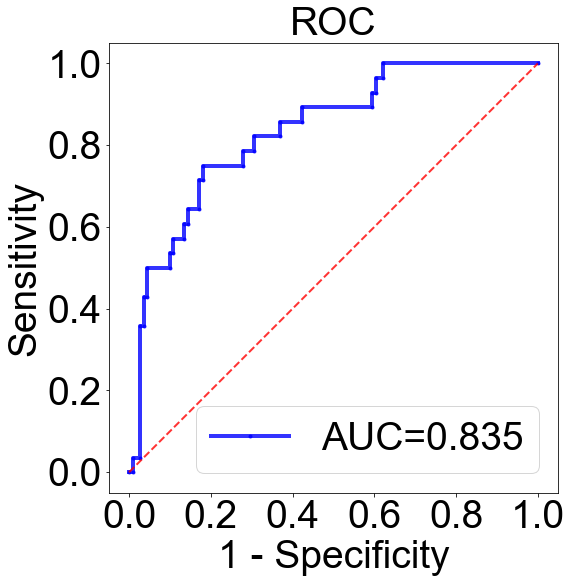

In [79]:
auc = roc_auc_score(df["Y"], df["p_1"])
# summarize scores
print('ROC AUC=%.3f' % (auc))
# calculate roc curves
fpr, tpr, thresholds = roc_curve(df["Y"], df["p_1"])


# plot the roc curve for the model
fig = pyplot.figure(figsize=(8.2,8.2))
ax = fig.add_subplot()

mpl.rc('font',family='Arial') # change the default fontname for all the text
# print(mpl.rcParams['font.family']) # useless, if not install the package, print "Arial" without using it
print(ax.xaxis.label.get_fontname()) # this works printing the true font

pyplot.xticks(fontsize=39) #35
pyplot.yticks(fontsize=39)

pyplot.plot(fpr, tpr, marker='.', color='b',label='AUC=%0.3f' % (auc),lw=4, alpha=.8)
pyplot.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',alpha=.8)

# tcga
# pyplot.title("Receiver Operating Characteristic of Best Fold ("+str(fold)+")")
# mondor
pyplot.title(r"ROC", fontsize=39) # " of model "+str(fold), Receiver Operating Characteristic

pyplot.xlabel('1 - Specificity', fontsize=39) # (False Positive Rate)
pyplot.ylabel('Sensitivity', fontsize=39) # (True Positive Rate)
# show the legend
pyplot.legend(loc="lower right", fontsize=39)

pyplot.gca().set_aspect('equal')
pyplot.tight_layout()

# save figure
# pyplot.savefig(os.path.join(path, "roc_" + str(fold) + ".png"), dpi=600)
pyplot.savefig(os.path.join('/home/visiopharm5/Downloads/immune_figures/mondor_roc', "roc_" + str(fold) + ".png"), dpi=600)
# show the plot
pyplot.show()